# GISTEMP 5.0

## Intro to GISTEMP:
Surface air temperature change is a primary measure of global climate change. The GISTEMP project started in the late 1970s to provide an estimate of the changing global surface air temperature which could be compared with the estimates obtained from climate models simulating the effect of changes in atmospheric carbon dioxide, volcanic aerosols, and solar irradiance.The continuing analysis updates global temperature change from the late 1800s to the present. The last major update of the GISTEMP codebase occurred in 2011 to convert the original code from Fortran to Python. Since then, many of the relevant libraries and development standards have evolved.

### Global Surface Temperature Anomalies:

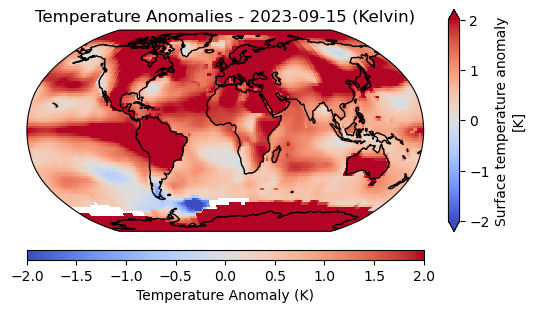

In [96]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import xarray as xr

# Load GISTEMP data
file = "gistemp1200_GHCNv4_ERSSTv5.nc"
combined_temp_ds = xr.open_dataset(file)

# Extract temperature data for the latest month
ds_latest_month = combined_temp_ds.isel(time=-1)

# Plot the map with the original title and Kelvin units
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.Robinson()})
cax = ds_latest_month['tempanomaly'].plot(transform=ccrs.PlateCarree(), cbar_kwargs={'shrink': 0.6}, cmap='coolwarm', vmin=-2, vmax=2)

# Add coastlines
ax.coastlines()

# Add title with date
date_str = str(ds_latest_month['time'].values)
ax.set_title(f'Temperature Anomalies - {date_str[:10]} (Kelvin)')

# Add colorbar
cbar = plt.colorbar(cax, ax=ax, orientation='horizontal', pad=0.05, aspect=40)
cbar.set_label('Temperature Anomaly (K)')

plt.show()

### Seasonal Changes in Temperature Anomaly:

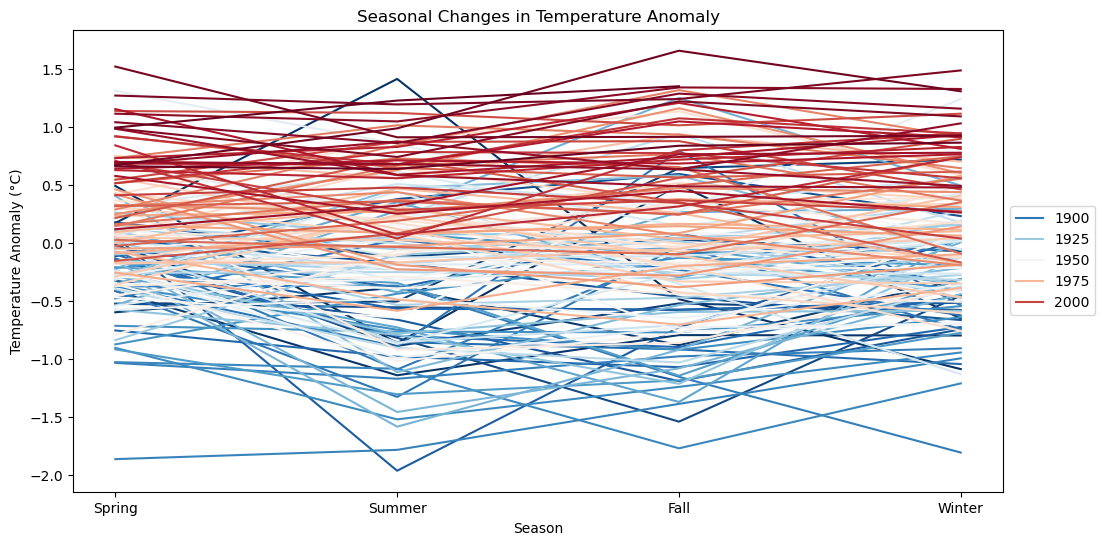

In [37]:
import xarray as xr
import seaborn as sns
import matplotlib.pyplot as plt

# Load GISTEMP data
file = "gistemp1200_GHCNv4_ERSSTv5.nc"
combined_temp_ds = xr.open_dataset(file)

# Extract the temperature data for a specific location
temperature_data = combined_temp_ds['tempanomaly'].sel(lat=0, lon=0, method='nearest')

# Resample the data to a seasonal frequency, with seasons starting in December
temperature_data_resampled = temperature_data.resample(time='Q-DEC').mean()

# Convert the resampled temperature data to a Pandas DataFrame
temperature_df = temperature_data_resampled.to_dataframe(name='Temperature Anomaly')

# Reset the index to make 'time' a column
temperature_df.reset_index(inplace=True)

# Extract the season and year from the 'time' column
temperature_df['Season'] = temperature_df['time'].dt.month.map({3: 'Spring', 6: 'Summer', 9: 'Fall', 12: 'Winter'})
temperature_df['Year'] = temperature_df['time'].dt.year

# Plot the seasonal changes using seaborn with blue/red color palette
plt.figure(figsize=(12, 6))
sns.lineplot(x='Season', y='Temperature Anomaly', hue='Year', palette='RdBu_r', data=temperature_df)
plt.title('Seasonal Changes in Temperature Anomaly')
plt.xlabel('Season')
plt.ylabel('Temperature Anomaly (°C)')

# Place legend to the right
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

### Annual Mean Temperature Over Years:

C:\Users\schandr8\AppData\Local\Temp\1\ipykernel_12776\3576209091.py:10: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df['Annual_Mean'] = df.iloc[:, 1:13].mean(axis=1)


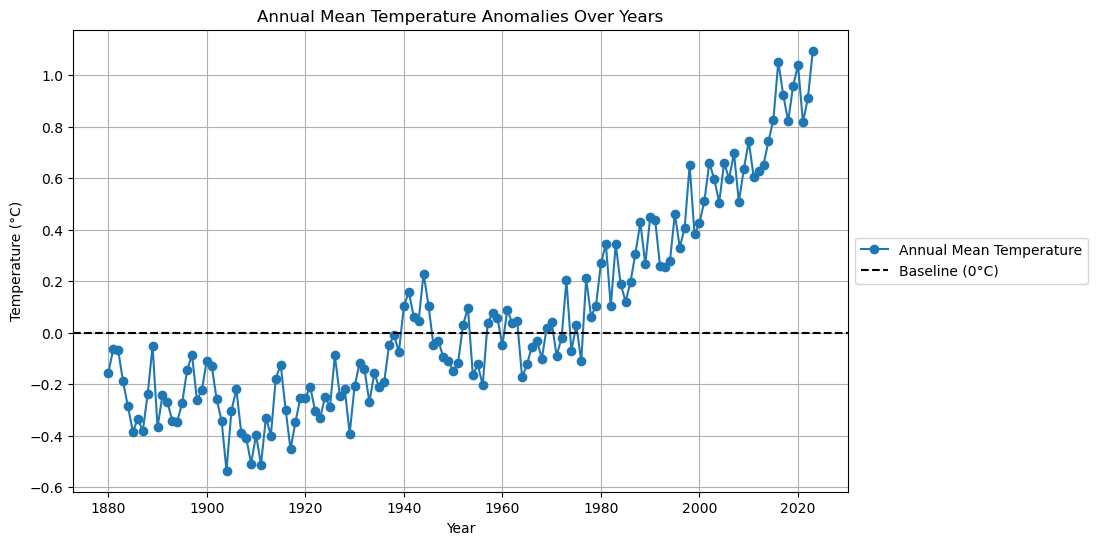

In [97]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = 'parameters/GLB.Ts+dSST.csv'

# Read the data from the file into a Pandas DataFrame
df = pd.read_csv(file_path, skiprows=[0])

# Calculate the annual mean temperature
df['Annual_Mean'] = df.iloc[:, 1:13].mean(axis=1)

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(df['Year'], df['Annual_Mean'], marker='o', linestyle='-', label='Annual Mean Temperature')
plt.axhline(0, color='black', linestyle='--', label='Baseline (0°C)')  # Add horizontal line at 0 for baseline comparison

# Add legend
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.title('Annual Mean Temperature Anomalies Over Years')
plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.grid(True)
plt.show()

### Annual Mean Temperature Change Over Three Latitude Bands:

<xarray.Dataset>
Dimensions:      (lat: 90, lon: 180, time: 1725, nv: 2)
Coordinates:
  * lat          (lat) float32 -89.0 -87.0 -85.0 -83.0 ... 83.0 85.0 87.0 89.0
  * lon          (lon) float32 -179.0 -177.0 -175.0 -173.0 ... 175.0 177.0 179.0
  * time         (time) datetime64[ns] 1880-01-15 1880-02-15 ... 2023-09-15
Dimensions without coordinates: nv
Data variables:
    time_bnds    (time, nv) datetime64[ns] ...
    tempanomaly  (time, lat, lon) float32 ...
Attributes:
    title:        GISTEMP Surface Temperature Analysis
    institution:  NASA Goddard Institute for Space Studies
    source:       http://data.giss.nasa.gov/gistemp/
    Conventions:  CF-1.6
    history:      Created 2023-10-11 11:54:46 by SBBX_to_nc 2.0 - ILAND=1200,...


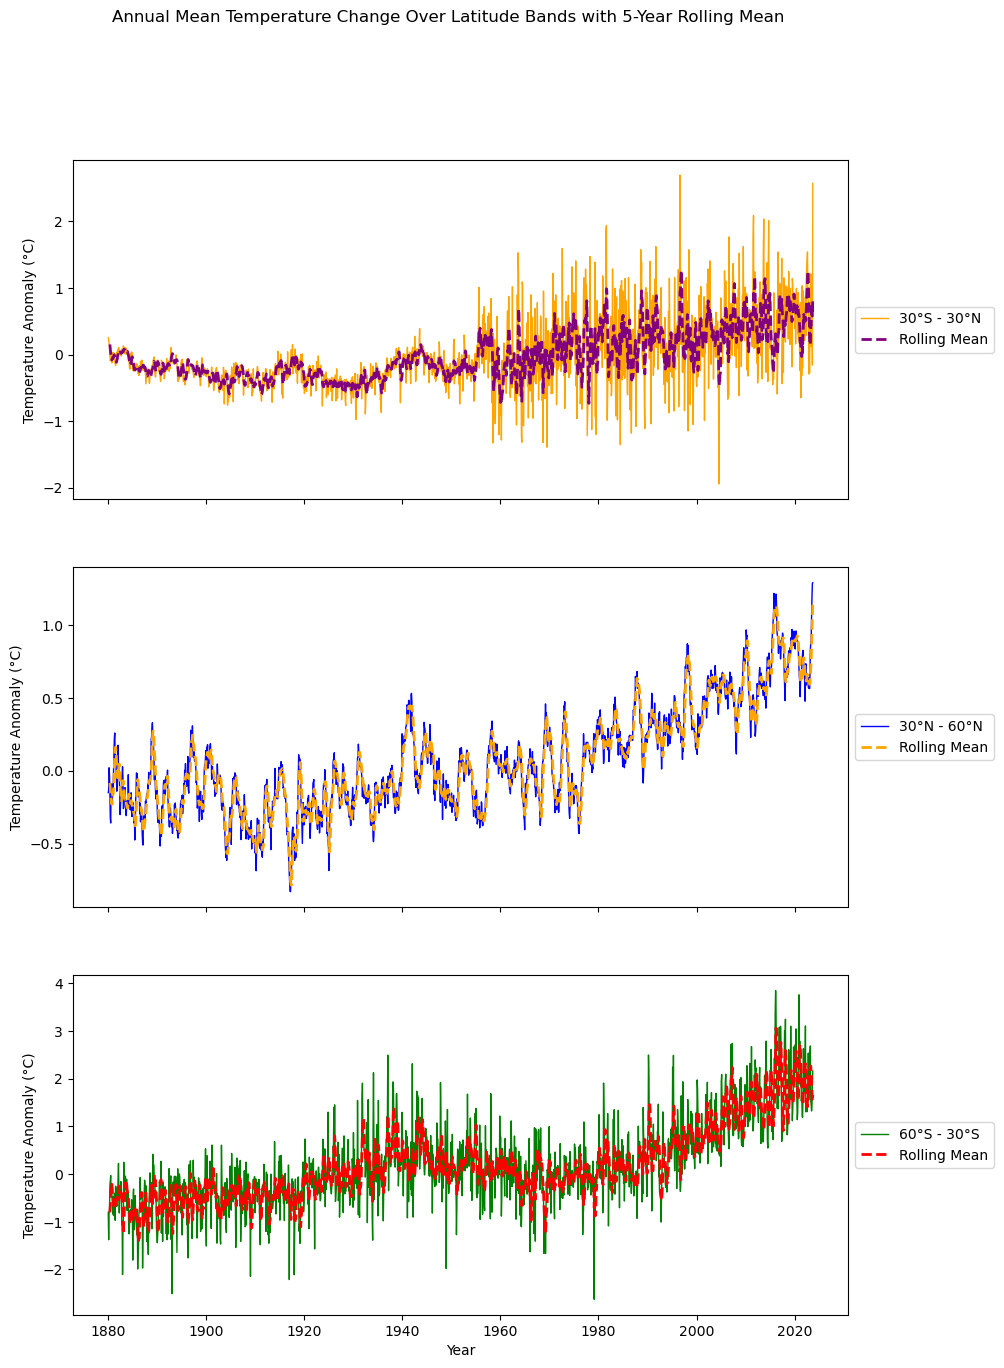

In [65]:
import xarray as xr
import matplotlib.pyplot as plt

# Load GISTEMP data
file = "gistemp1200_GHCNv4_ERSSTv5.nc"
combined_temp_ds = xr.open_dataset(file)

# Display available variables in the dataset
print(combined_temp_ds)

# Extract annual mean temperature over three latitude bands
latitude_bands = [
    combined_temp_ds['tempanomaly'].sel(lat=slice(-90, -30)).mean(dim=['lat', 'lon']),
    combined_temp_ds['tempanomaly'].sel(lat=slice(-30, 30)).mean(dim=['lat', 'lon']),
    combined_temp_ds['tempanomaly'].sel(lat=slice(30, 90)).mean(dim=['lat', 'lon']),
]

# Calculate five-year rolling mean for each latitude band
rolling_mean_bands = [band.rolling(time=5).mean() for band in latitude_bands]

# Plot annual mean temperature change over three latitude bands in subplots
fig, axes = plt.subplots(3, 1, figsize=(10, 15), sharex=True)

# Plot green band with rolling mean
axes[2].plot(combined_temp_ds['time'], latitude_bands[2], label='60°S - 30°S', linewidth=1, color='green')
axes[2].plot(combined_temp_ds['time'], rolling_mean_bands[2], label='Rolling Mean', linewidth=2, linestyle='--', color='red')
axes[2].set_ylabel('Temperature Anomaly (°C)')
axes[2].legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Plot blue band with rolling mean
axes[1].plot(combined_temp_ds['time'], latitude_bands[1], label='30°N - 60°N', linewidth=1, color='blue')
axes[1].plot(combined_temp_ds['time'], rolling_mean_bands[1], label='Rolling Mean', linewidth=2, linestyle='--', color='orange')
axes[1].set_ylabel('Temperature Anomaly (°C)')
axes[1].legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Plot orange band with rolling mean
axes[0].plot(combined_temp_ds['time'], latitude_bands[0], label='30°S - 30°N', linewidth=1, color='orange')
axes[0].plot(combined_temp_ds['time'], rolling_mean_bands[0], label='Rolling Mean', linewidth=2, linestyle='--', color='purple')
axes[0].set_ylabel('Temperature Anomaly (°C)')
axes[0].legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.xlabel('Year')
plt.suptitle('Annual Mean Temperature Change Over Latitude Bands with 5-Year Rolling Mean')
plt.show()

### Global Mean Surface Temperature Change:

In [42]:
import matplotlib.pyplot as plt
import xarray as xr

In [43]:
# Load GISTEMP data
file = "gistemp1200_GHCNv4_ERSSTv5.nc"
combined_temp_ds = xr.open_dataset(file)

# Extract global mean temperature
global_mean_temp = combined_temp_ds['tempanomaly'].mean(dim=['lat', 'lon'])

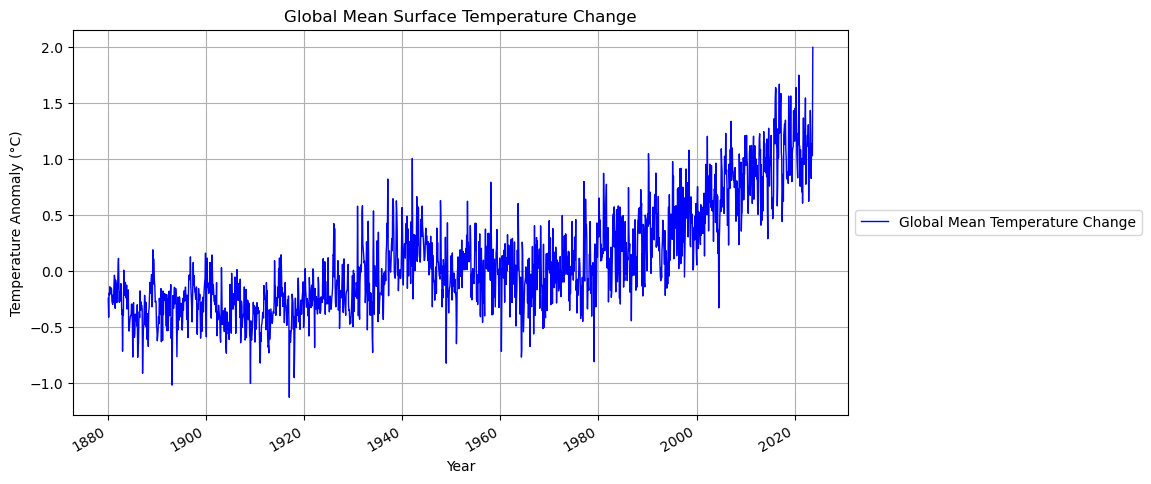

In [44]:
# Plot the global mean temperature change
plt.figure(figsize=(10, 5))
global_mean_temp.plot(label='Global Mean Temperature Change', color='b', linewidth=1)
plt.title('Global Mean Surface Temperature Change')
plt.xlabel('Year')
plt.ylabel('Temperature Anomaly (°C)')

# Place legend to the right
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True)
plt.show()

### Global Temperature Mean Anomalies for Each Season (Individual Graphs):

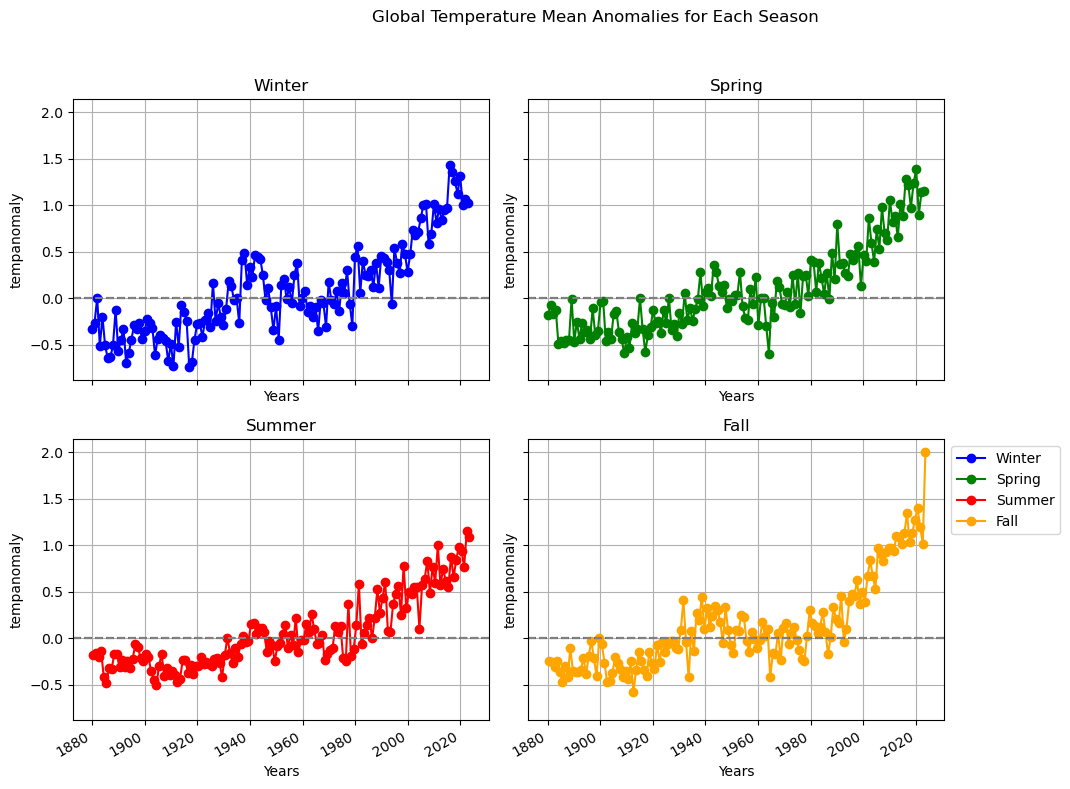

In [67]:
import matplotlib.pyplot as plt
import xarray as xr

# Load GISTEMP data
file = "gistemp1200_GHCNv4_ERSSTv5.nc"
combined_temp_ds = xr.open_dataset(file)

# Resample the data to a seasonal frequency
temp_seasonal = combined_temp_ds['tempanomaly'].resample(time='QS-DEC').mean()

# Separate data for each season
winter_data = temp_seasonal.sel(time=temp_seasonal['time.season'] == 'DJF')
spring_data = temp_seasonal.sel(time=temp_seasonal['time.season'] == 'MAM')
summer_data = temp_seasonal.sel(time=temp_seasonal['time.season'] == 'JJA')
fall_data = temp_seasonal.sel(time=temp_seasonal['time.season'] == 'SON')

# Plot each season as a line graph with different colors and line thickness
fig, axes = plt.subplots(2, 2, figsize=(12, 8), sharex=True, sharey=True)
fig.suptitle('Global Temperature Mean Anomalies for Each Season')

# Winter
winter_line, = winter_data.mean(dim=['lat', 'lon']).plot.line(ax=axes[0, 0], marker='o', label='Winter', color='blue', linewidth=1.5)
axes[0, 0].set_title('Winter')
axes[0, 0].axhline(0, color='black', linestyle='--', label='Zero Degree Line')  # Add horizontal zero-degree line
axes[0, 0].axhline(combined_temp_ds['tempanomaly'].sel(time=slice('1951-01-01', '1980-12-31')).mean(), color='gray', linestyle='--', label='Baseline (1951-1980)')  # Add baseline 1951-1980 line
axes[0, 0].grid(True)
axes[0, 0].set_xlabel('Years')  # Change x-axis label to 'Years'

# Spring
spring_line, = spring_data.mean(dim=['lat', 'lon']).plot.line(ax=axes[0, 1], marker='o', label='Spring', color='green', linewidth=1.5)
axes[0, 1].set_title('Spring')
axes[0, 1].axhline(0, color='black', linestyle='--', label='Zero Degree Line')  # Add horizontal zero-degree line
axes[0, 1].axhline(combined_temp_ds['tempanomaly'].sel(time=slice('1951-01-01', '1980-12-31')).mean(), color='gray', linestyle='--', label='Baseline (1951-1980)')  # Add baseline 1951-1980 line
axes[0, 1].grid(True)
axes[0, 1].set_xlabel('Years')  # Change x-axis label to 'Years'

# Summer
summer_line, = summer_data.mean(dim=['lat', 'lon']).plot.line(ax=axes[1, 0], marker='o', label='Summer', color='red', linewidth=1.5)
axes[1, 0].set_title('Summer')
axes[1, 0].axhline(0, color='black', linestyle='--', label='Zero Degree Line')  # Add horizontal zero-degree line
axes[1, 0].axhline(combined_temp_ds['tempanomaly'].sel(time=slice('1951-01-01', '1980-12-31')).mean(), color='gray', linestyle='--', label='Baseline (1951-1980)')  # Add baseline 1951-1980 line
axes[1, 0].grid(True)
axes[1, 0].set_xlabel('Years')  # Change x-axis label to 'Years'

# Fall
fall_line, = fall_data.mean(dim=['lat', 'lon']).plot.line(ax=axes[1, 1], marker='o', label='Fall', color='orange', linewidth=1.5)
axes[1, 1].set_title('Fall')
axes[1, 1].axhline(0, color='black', linestyle='--', label='Zero Degree Line')  # Add horizontal zero-degree line
axes[1, 1].axhline(combined_temp_ds['tempanomaly'].sel(time=slice('1951-01-01', '1980-12-31')).mean(), color='gray', linestyle='--', label='Baseline (1951-1980)')  # Add baseline 1951-1980 line
axes[1, 1].grid(True)
axes[1, 1].set_xlabel('Years')  # Change x-axis label to 'Years'

# Collect handles and labels for creating a single legend
handles = [winter_line, spring_line, summer_line, fall_line]
labels = [handle.get_label() for handle in handles]

# Add a single legend outside the subplots
axes.flatten()[-1].legend(handles=handles, labels=labels, loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout(rect=[0, 0, 0.9, 0.95])
plt.show()

### Global Temperature Mean Anomalies for Each Season (Single Graph):

In [97]:
import matplotlib.pyplot as plt
import xarray as xr

In [98]:
# Load GISTEMP data
file = "gistemp1200_GHCNv4_ERSSTv5.nc"
combined_temp_ds = xr.open_dataset(file)

# Resample the data to a seasonal frequency
temp_seasonal = combined_temp_ds['tempanomaly'].resample(time='QS-DEC').mean()

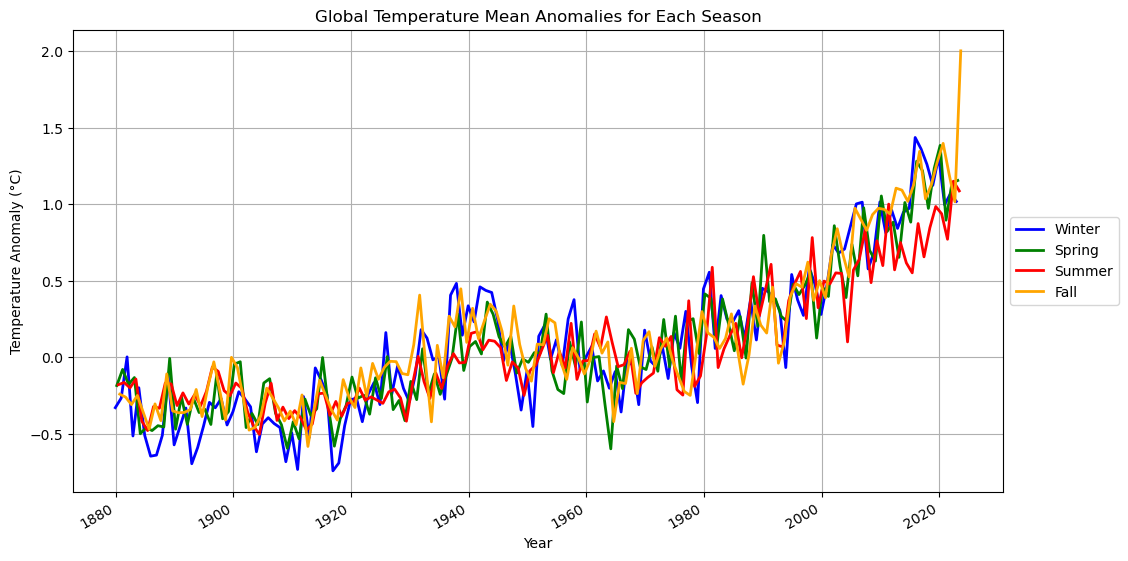

In [101]:
# Plot each season as a line graph with different colors and line thickness
plt.figure(figsize=(12, 6))

# Winter
temp_seasonal.sel(time=temp_seasonal['time.season'] == 'DJF').mean(dim=['lat', 'lon']).plot.line(label='Winter', color='blue', linewidth=2)

# Spring
temp_seasonal.sel(time=temp_seasonal['time.season'] == 'MAM').mean(dim=['lat', 'lon']).plot.line(label='Spring', color='green', linewidth=2)

# Summer
temp_seasonal.sel(time=temp_seasonal['time.season'] == 'JJA').mean(dim=['lat', 'lon']).plot.line(label='Summer', color='red', linewidth=2)

# Fall
temp_seasonal.sel(time=temp_seasonal['time.season'] == 'SON').mean(dim=['lat', 'lon']).plot.line(label='Fall', color='orange', linewidth=2)

plt.title('Global Temperature Mean Anomalies for Each Season')
plt.xlabel('Year')
plt.ylabel('Temperature Anomaly (°C)')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True)
plt.show()

### Latest Month Temperature Anomaly (United States):

In [13]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import xarray as xr

In [14]:
# Load GISTEMP data
file = "gistemp1200_GHCNv4_ERSSTv5.nc"
combined_temp_ds = xr.open_dataset(file)

# Extract temperature data for the United States (replace lat and lon with desired coordinates)
us_temperature_data = combined_temp_ds['tempanomaly'].sel(lat=slice(24, 49), lon=slice(-125, -66))

# Select the latest month
latest_month_temp = us_temperature_data.isel(time=-1)

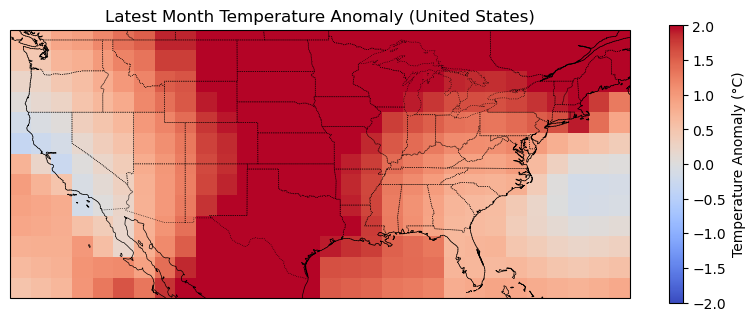

In [70]:
# Plot the static map
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()}, figsize=(10, 6))
cax = ax.pcolormesh(latest_month_temp.lon, latest_month_temp.lat, latest_month_temp, shading='auto', cmap='coolwarm', vmin=-2, vmax=2)
fig.colorbar(cax, label='Temperature Anomaly (°C)', shrink=0.6)

# Add state borders
ax.add_feature(cfeature.STATES, linestyle=':', edgecolor='black', linewidth=0.5)

# Add coastlines
ax.add_feature(cfeature.COASTLINE, linestyle='-', edgecolor='black', linewidth=0.5)

# Set title
ax.set_title('Latest Month Temperature Anomaly (United States)')

plt.show()

### Latest Month Temperature Anomaly (Global):

In [16]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import xarray as xr

In [17]:
# Load GISTEMP data
file = "gistemp1200_GHCNv4_ERSSTv5.nc"
combined_temp_ds = xr.open_dataset(file)

# Extract global temperature data
global_temperature_data = combined_temp_ds['tempanomaly']

# Select the latest month
latest_month_temp_global = global_temperature_data.isel(time=-1)

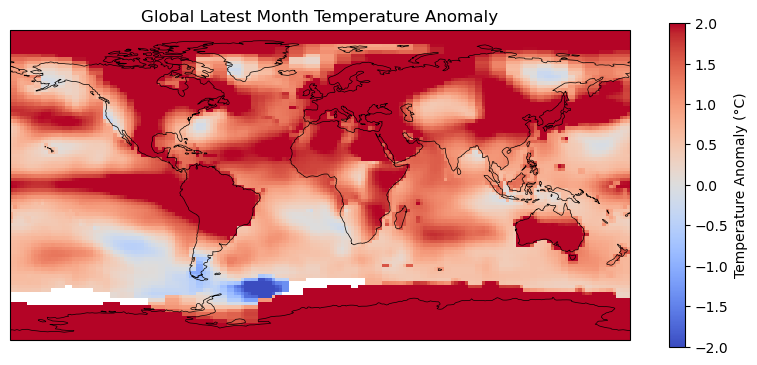

In [72]:
# Plot the static map
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()}, figsize=(10, 6))
cax = ax.pcolormesh(latest_month_temp_global.lon, latest_month_temp_global.lat, latest_month_temp_global, shading='auto', cmap='coolwarm', vmin=-2, vmax=2)
fig.colorbar(cax, label='Temperature Anomaly (°C)', shrink=0.7)

# Add coastlines
ax.add_feature(cfeature.COASTLINE, linestyle='-', edgecolor='black', linewidth=0.5)

# Set title
ax.set_title('Global Latest Month Temperature Anomaly')

plt.show()

### Seasonal Means (Global):

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
# Read in GISTEMP data as dataframe, skip header, set year as index
gistemp_file = 'parameters/GLB.Ts+dSST.csv'
df_full = pd.read_csv(gistemp_file, header=1)
df_full = df_full.set_index('Year')

In [10]:
# Drop non-monthly columns
df = df_full.iloc[:, :12]

# Drop 2023 (incomplete)
df = df.head(len(df) - 1)

# Convert to floats
df = df.astype(float)

C:\Users\schandr8\AppData\Local\Temp\1\ipykernel_12776\3655534401.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  plt.plot(df[['Dec', 'Jan', 'Feb']].mean(axis=1), label="DJF")
C:\Users\schandr8\AppData\Local\Temp\1\ipykernel_12776\3655534401.py:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  plt.plot(df[['Sep', 'Oct', 'Nov']].mean(axis=1), label="SON")


<function matplotlib.pyplot.show(close=None, block=None)>

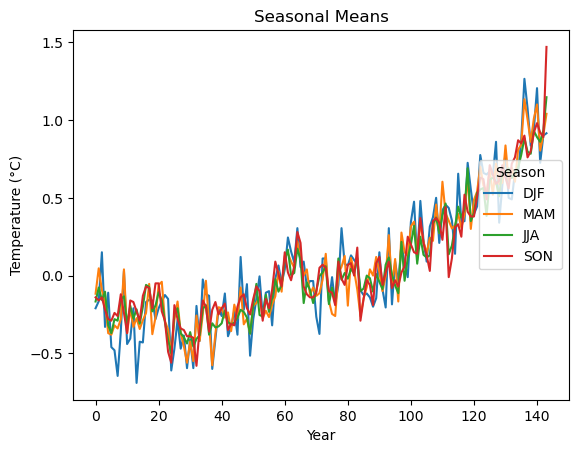

In [58]:
# Plot the four line plots for the four seasons on one graph
plt.plot(df[['Dec', 'Jan', 'Feb']].mean(axis=1), label="DJF")
plt.plot(df[['Mar', 'Apr', 'May']].mean(axis=1), label="MAM")
plt.plot(df[['Jun', 'Jul', 'Aug']].mean(axis=1), label="JJA")
plt.plot(df[['Sep', 'Oct', 'Nov']].mean(axis=1), label="SON")

plt.title('Seasonal Means')
plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.legend(title='Season', loc= 'center right', bbox_to_anchor=(1, 0.5))
plt.show

### Seasonal Means (Northern Hemisphere):

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Read in GISTEMP data as dataframe, skip header, set year as index
gistemp_file = 'parameters/NH.Ts+dSST.csv'
df_full = pd.read_csv(gistemp_file, header=1)
df_full = df_full.set_index('Year')

In [ ]:
# Drop non-monthly columns
df = df_full.iloc[:, :12]

# Drop 2023 (incomplete)
df = df.head(len(df) - 1)

# Convert to floats
df = df.astype(float)

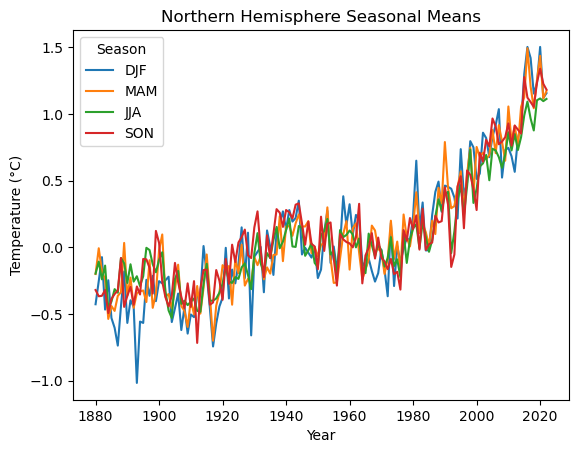

In [5]:
# Plot the four line plots for the four seasons on one graph (Northern Hemisphere)
plt.plot(df[['Dec', 'Jan', 'Feb']].mean(axis=1), label="DJF")
plt.plot(df[['Mar', 'Apr', 'May']].mean(axis=1), label="MAM")
plt.plot(df[['Jun', 'Jul', 'Aug']].mean(axis=1), label="JJA")
plt.plot(df[['Sep', 'Oct', 'Nov']].mean(axis=1), label="SON")

plt.title('Northern Hemisphere Seasonal Means')
plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.legend(title='Season', loc='upper left')
plt.show()

### Seasonal Means (Southern Hemisphere):

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

In [13]:
# Read in GISTEMP data as dataframe, skip header, set year as index
gistemp_file = 'parameters/SH.Ts+dSST.csv'
df_full = pd.read_csv(gistemp_file, header=1)
df_full = df_full.set_index('Year')

In [14]:
# Drop non-monthly columns
df = df_full.iloc[:, :12]

# Drop 2023 (incomplete)
df = df.head(len(df) - 1)

# Convert to floats
df = df.astype(float)

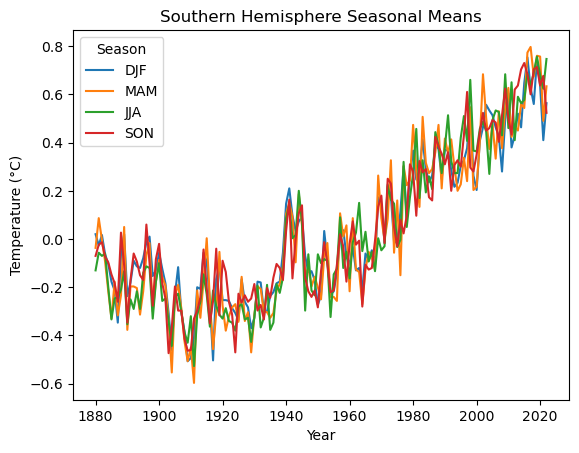

In [15]:
# Plot the four line plots for the four seasons on one graph (Southern Hemisphere)
plt.plot(df[['Dec', 'Jan', 'Feb']].mean(axis=1), label="DJF")
plt.plot(df[['Mar', 'Apr', 'May']].mean(axis=1), label="MAM")
plt.plot(df[['Jun', 'Jul', 'Aug']].mean(axis=1), label="JJA")
plt.plot(df[['Sep', 'Oct', 'Nov']].mean(axis=1), label="SON")

plt.title('Southern Hemisphere Seasonal Means')
plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.legend(title='Season', loc='upper left')
plt.show()

### United States Latest Month Temperature Anomaly (Dropdown):

In [73]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import xarray as xr
import ipywidgets as widgets
from IPython.display import display

In [74]:
# Load GISTEMP data
file = "gistemp1200_GHCNv4_ERSSTv5.nc"
combined_temp_ds = xr.open_dataset(file)

# Extract temperature data for the United States (replace lat and lon with desired coordinates)
us_temperature_data = combined_temp_ds['tempanomaly'].sel(lat=slice(24, 49), lon=slice(-125, -66))

# Select the latest month
latest_month_temp = us_temperature_data.isel(time=-1)

In [75]:
# Create dropdown widgets
cmap_dropdown = widgets.Dropdown(
    options=['viridis', 'plasma', 'coolwarm', 'RdBu_r'],
    value='coolwarm',
    description='Colormap:'
)

vmin_slider = widgets.FloatSlider(
    value=-2,
    min=-5,
    max=5,
    step=0.1,
    description='Min Temperature (°C):'
)

vmax_slider = widgets.FloatSlider(
    value=2,
    min=-5,
    max=5,
    step=0.1,
    description='Max Temperature (°C):'
)

In [80]:
# Define function to update the plot based on user input
def update_plot(colormap, vmin, vmax):
    fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()}, figsize=(10, 6))
    cax = ax.pcolormesh(latest_month_temp.lon, latest_month_temp.lat, latest_month_temp, shading='auto', cmap=colormap, vmin=vmin, vmax=vmax)
    fig.colorbar(cax, label='Temperature Anomaly (°C)', shrink=0.6)
    ax.add_feature(cfeature.STATES, linestyle=':', edgecolor='black', linewidth=0.5)
    ax.add_feature(cfeature.COASTLINE, linestyle='-', edgecolor='black', linewidth=0.5)
    ax.set_title('Latest Month Temperature Anomaly (United States)')
    plt.show()

In [81]:
# Create interactive widget with the update function
interactive_plot = widgets.interactive(update_plot, colormap=cmap_dropdown, vmin=vmin_slider, vmax=vmax_slider)

# Display the interactive plot
display(interactive_plot)

interactive(children=(Dropdown(description='Colormap:', index=2, options=('viridis', 'plasma', 'coolwarm', 'Rd…

### Global Latest Month Temperature Anomaly (Dropdown):

In [82]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import xarray as xr
import ipywidgets as widgets
from IPython.display import display

In [83]:
# Load GISTEMP data
file = "gistemp1200_GHCNv4_ERSSTv5.nc"
combined_temp_ds = xr.open_dataset(file)

# Extract global temperature data
global_temperature_data = combined_temp_ds['tempanomaly']

# Select the latest month
latest_month_temp_global = global_temperature_data.isel(time=-1)

In [84]:
# Dropdown for colormap
colormap_dropdown = widgets.Dropdown(
    options=['coolwarm', 'viridis', 'plasma', 'inferno'],
    value='coolwarm',
    description='Colormap:'
)

# Dropdown for temperature anomaly range
temp_range_dropdown = widgets.FloatRangeSlider(
    value=[-2, 2],
    min=-5, max=5, step=0.1,
    description='Temp Range:'
)

In [85]:
# Function to update the plot
def update_plot(colormap, temp_range):
    fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()}, figsize=(10, 6))
    cax = ax.pcolormesh(latest_month_temp_global.lon, latest_month_temp_global.lat, latest_month_temp_global, shading='auto', cmap=colormap, vmin=temp_range[0], vmax=temp_range[1])
    fig.colorbar(cax, label='Temperature Anomaly (°C)', shrink=0.7)
    ax.add_feature(cfeature.COASTLINE, linestyle='-', edgecolor='black', linewidth=0.5)
    ax.set_title('Global Latest Month Temperature Anomaly')
    plt.show()

In [86]:
# Create interactive widgets
interactive_plot = widgets.interactive(update_plot, colormap=colormap_dropdown, temp_range=temp_range_dropdown)

# Display the interactive plot
display(interactive_plot)

interactive(children=(Dropdown(description='Colormap:', options=('coolwarm', 'viridis', 'plasma', 'inferno'), …

### Global Temperature Anomalies:

In [87]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np
import pandas as pd
import ipywidgets as widgets
from IPython.display import display

In [88]:
# Load GISTEMP data
file = "gistemp1200_GHCNv4_ERSSTv5.nc"
combined_temp_ds = xr.open_dataset(file)

ds_latest_month = combined_temp_ds.sel(time=combined_temp_ds.time[-1])

In [89]:
# Dropdown for colormap
colormap_dropdown = widgets.Dropdown(
    options=['coolwarm', 'viridis', 'plasma', 'inferno'],
    value='coolwarm',
    description='Colormap:'
)

# Dropdown for temperature anomaly range
temp_range_dropdown = widgets.FloatRangeSlider(
    value=[-2, 2],
    min=-5, max=5, step=0.1,
    description='Temp Range:'
)

In [90]:
# Function to update the plot
def update_plot(colormap, temp_range):
    fig, ax = plt.subplots(subplot_kw={'projection': ccrs.Robinson()})
    ds_latest_month.tempanomaly.plot(transform=ccrs.PlateCarree(), cbar_kwargs={'shrink': 0.6}, cmap=colormap, vmin=temp_range[0], vmax=temp_range[1])
    ax.coastlines()
    ax.set_title('Temperature Anomalies')
    plt.show()

In [91]:
# Create interactive widgets
interactive_plot = widgets.interactive(update_plot, colormap=colormap_dropdown, temp_range=temp_range_dropdown)

# Display the interactive plot
display(interactive_plot)

interactive(children=(Dropdown(description='Colormap:', options=('coolwarm', 'viridis', 'plasma', 'inferno'), …